In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings

import warnings
warnings.filterwarnings('ignore')

# K-means clustering

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierachical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## 1. Reading the data

In [2]:
country_data = pd.read_csv("Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 2. Cleaning and checking the data

As we can see from the data dictionary provided, we can see that variables "exports", "health", "imports" are given in percentage.

**Hence, we need to convert it to absolute values.**

The formula we will be using is:
**Absolute Value = GDPP * precentage value of GDPP / 100**

In [3]:
country_data['exports'] = (country_data['exports']*country_data['gdpp'])/100
country_data['health'] = (country_data['health']*country_data['gdpp'])/100
country_data['imports'] = (country_data['imports']*country_data['gdpp'])/100

In [4]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


Let us perform some final checks on the data -

In [5]:
country_data.shape

(167, 10)

In [6]:
# Checking for datatypes
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Here, "country" column is object, as expected since the values are non-numeric.
Datatypes of other columns also make sense.

In [7]:
# Checking for null values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Data has no null values, hence it is clean.

In [8]:
# Checking the values
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# Checking if countries are not repeating
counts = country_data.nunique()
counts.country

167

Here, we can see that there are 167 unique entries in the column "country" which is nothing but the total number of entires. **We can conclude that the countries are not repeating.**

**The data is now clean and ready for EDA.**

## 3. Exploratory Data Analysis (EDA) -

### 3.1 Univariate Data Analysis

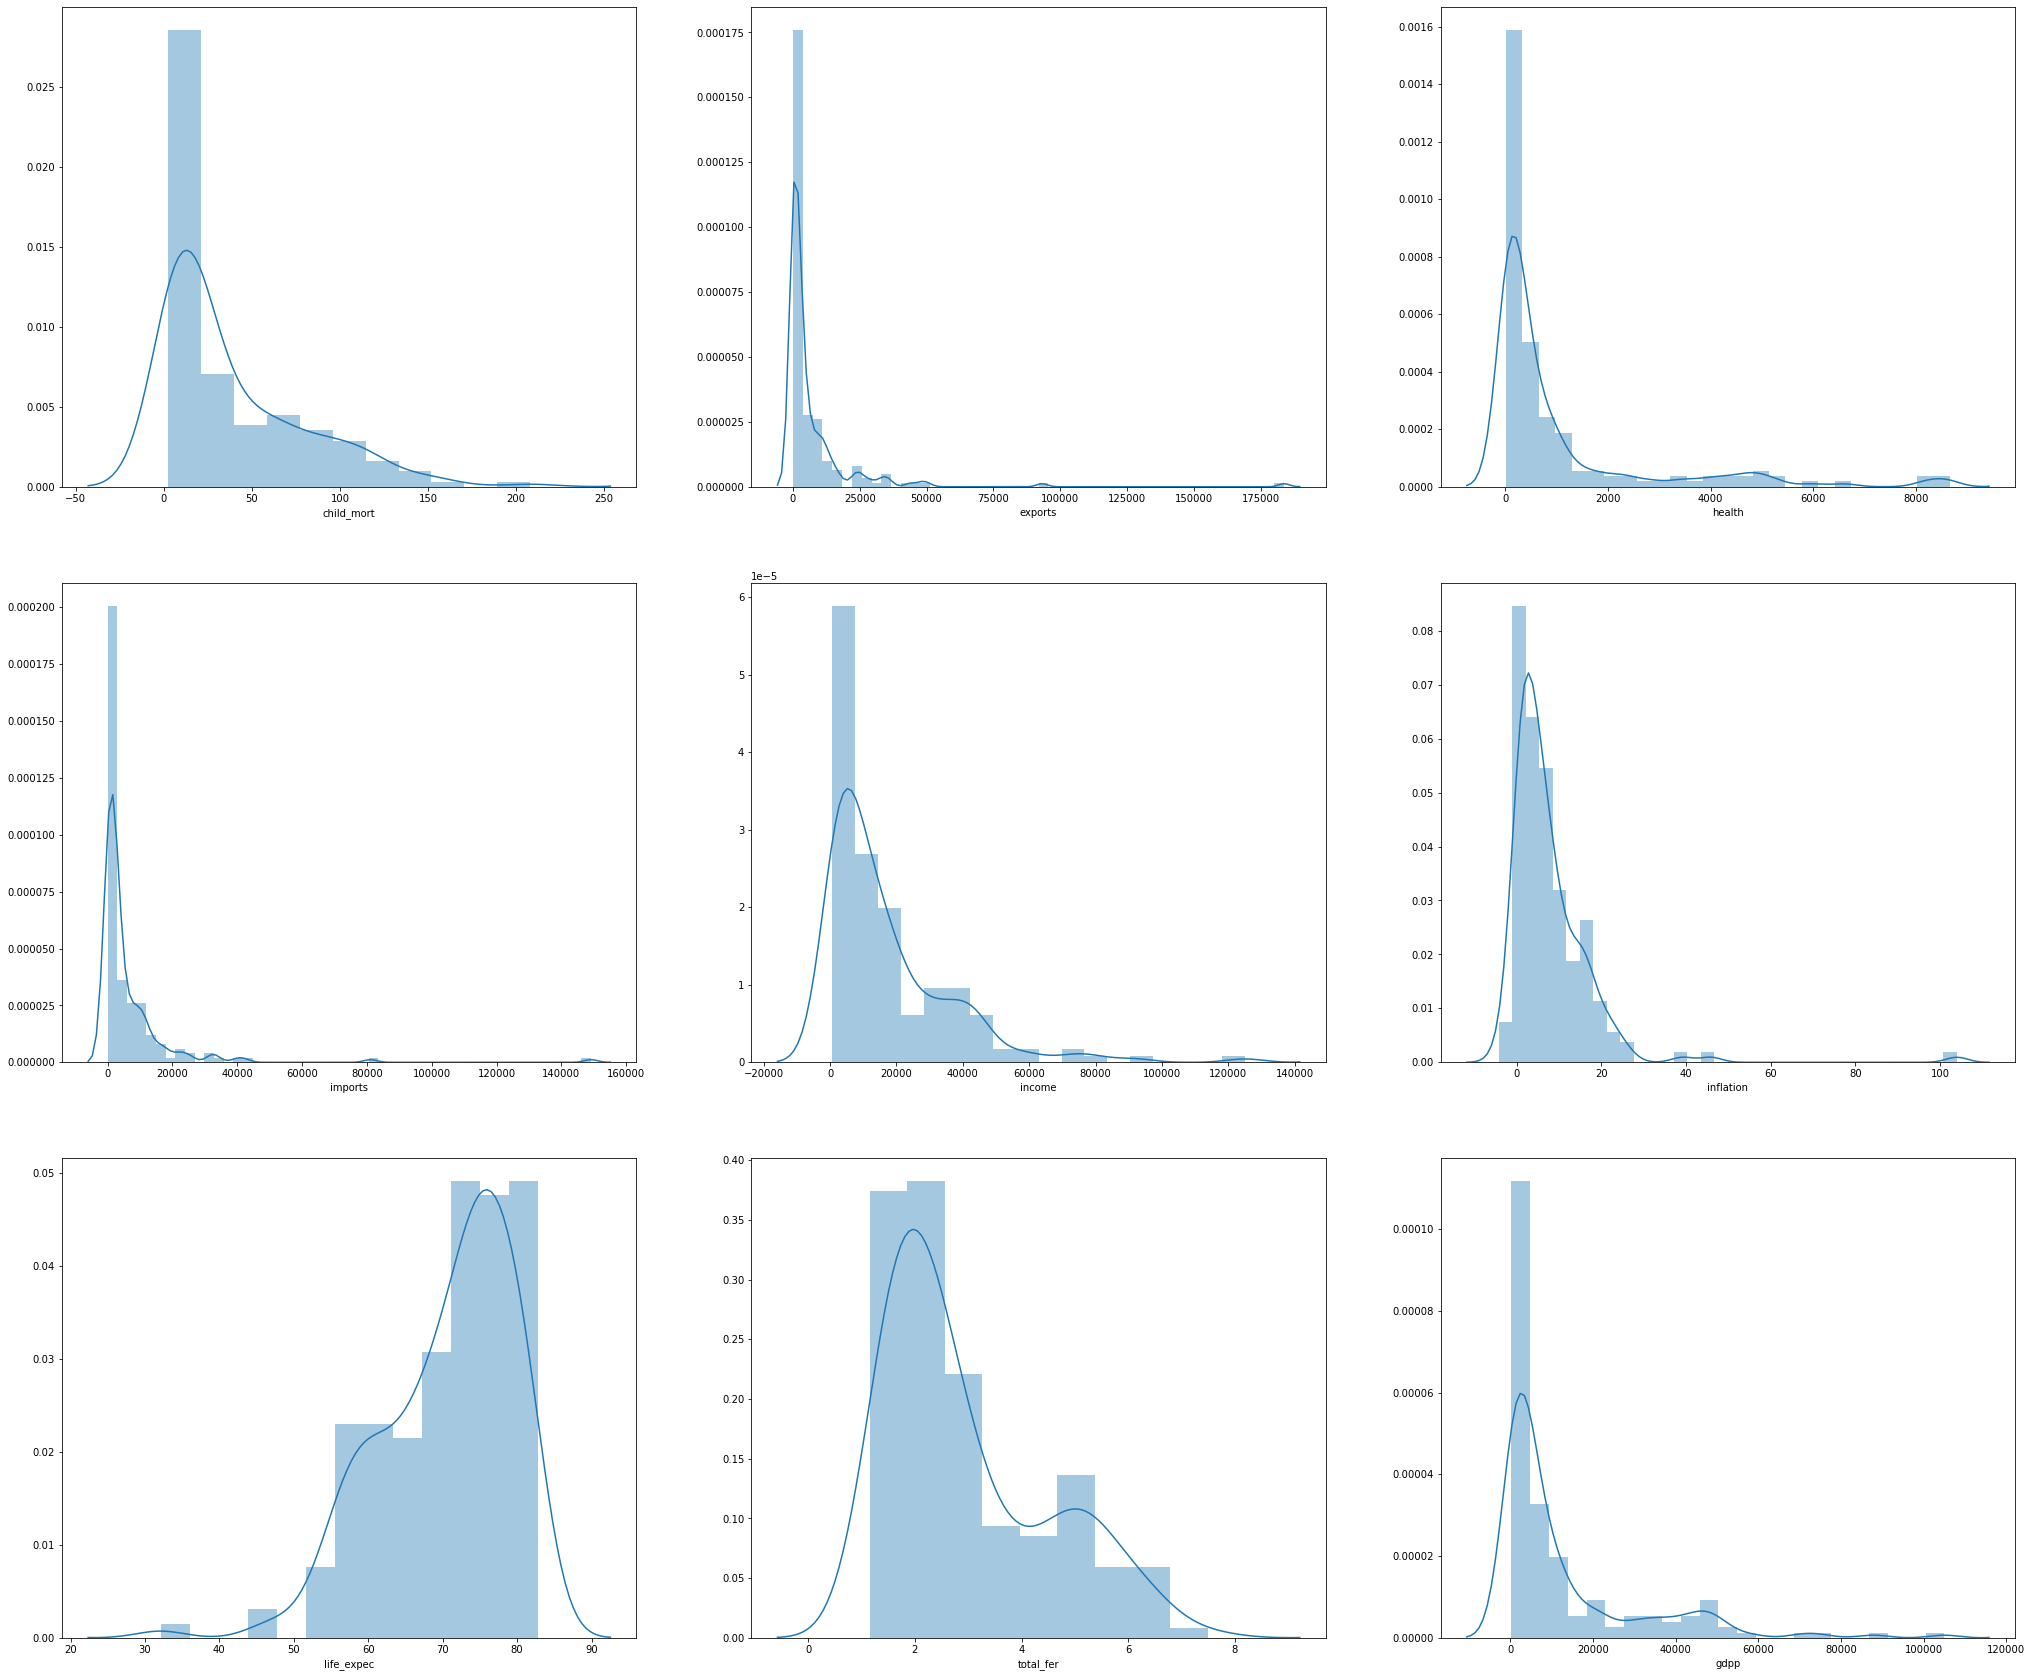

In [10]:
plt.figure(figsize = (35,30))
f = country_data.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_data[i[1]])

We will be using all the varaiables for the clustering but **"gdpp", "child_mort" and "income"** for profiling!

### 3.2 Bivariate Data Analysis

#### 3.2.1 Correlation Matrix using Heat Map -

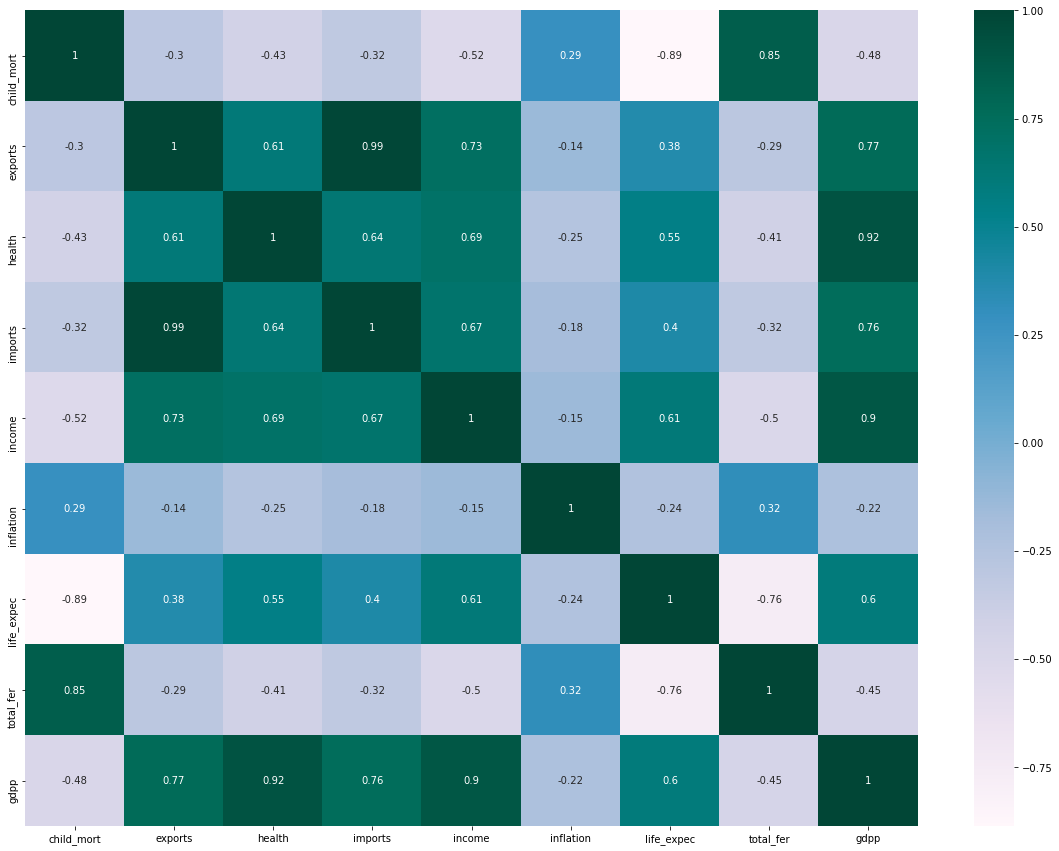

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(country_data.corr(),annot = True, cmap = "PuBuGn")
plt.show()

##### Here we can see the following trends - 
- GDPP has high positive correlation with income and health.
- Total fertility rate has high positive correlation with child mortality rate.
- Life expectancy and child mortality have high negative correlation
- Total fertility and life expectancy also have a high negative correlation

Let us also look at the trends using pair plots.

#### 3.2.2 Pairplot

<Figure size 2160x1800 with 0 Axes>

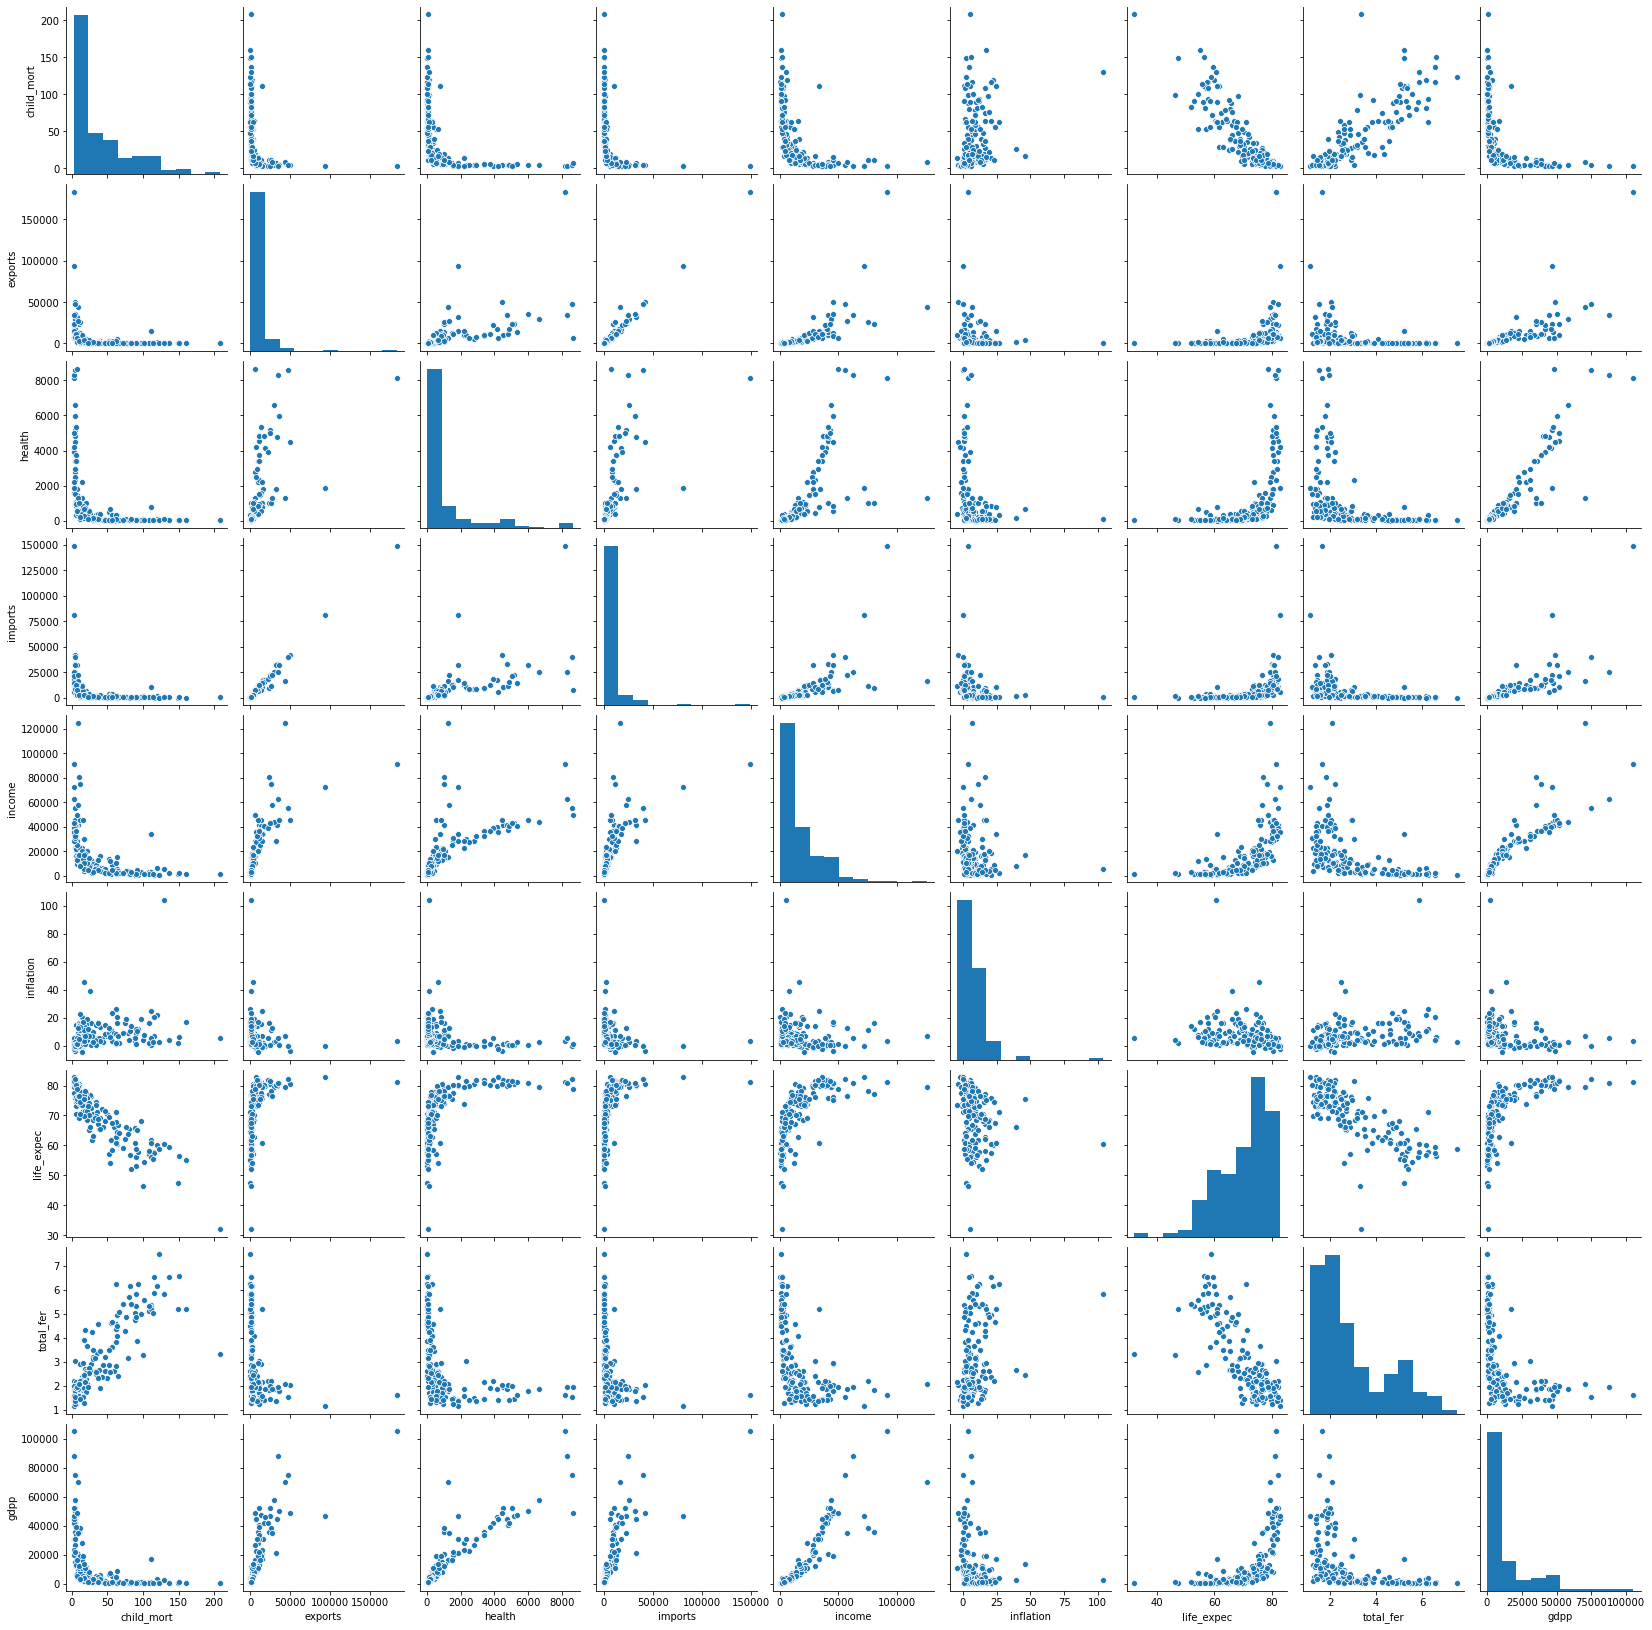

In [12]:
plt.figure(figsize=(30,25))
sns.pairplot(country_data, kind='scatter')
plt.show()

**Note:** Please double click on the plot to zoom in.

The insights found from the heatmap above, can be seen in the pairplot as well.

##### 1. gdpp of countries

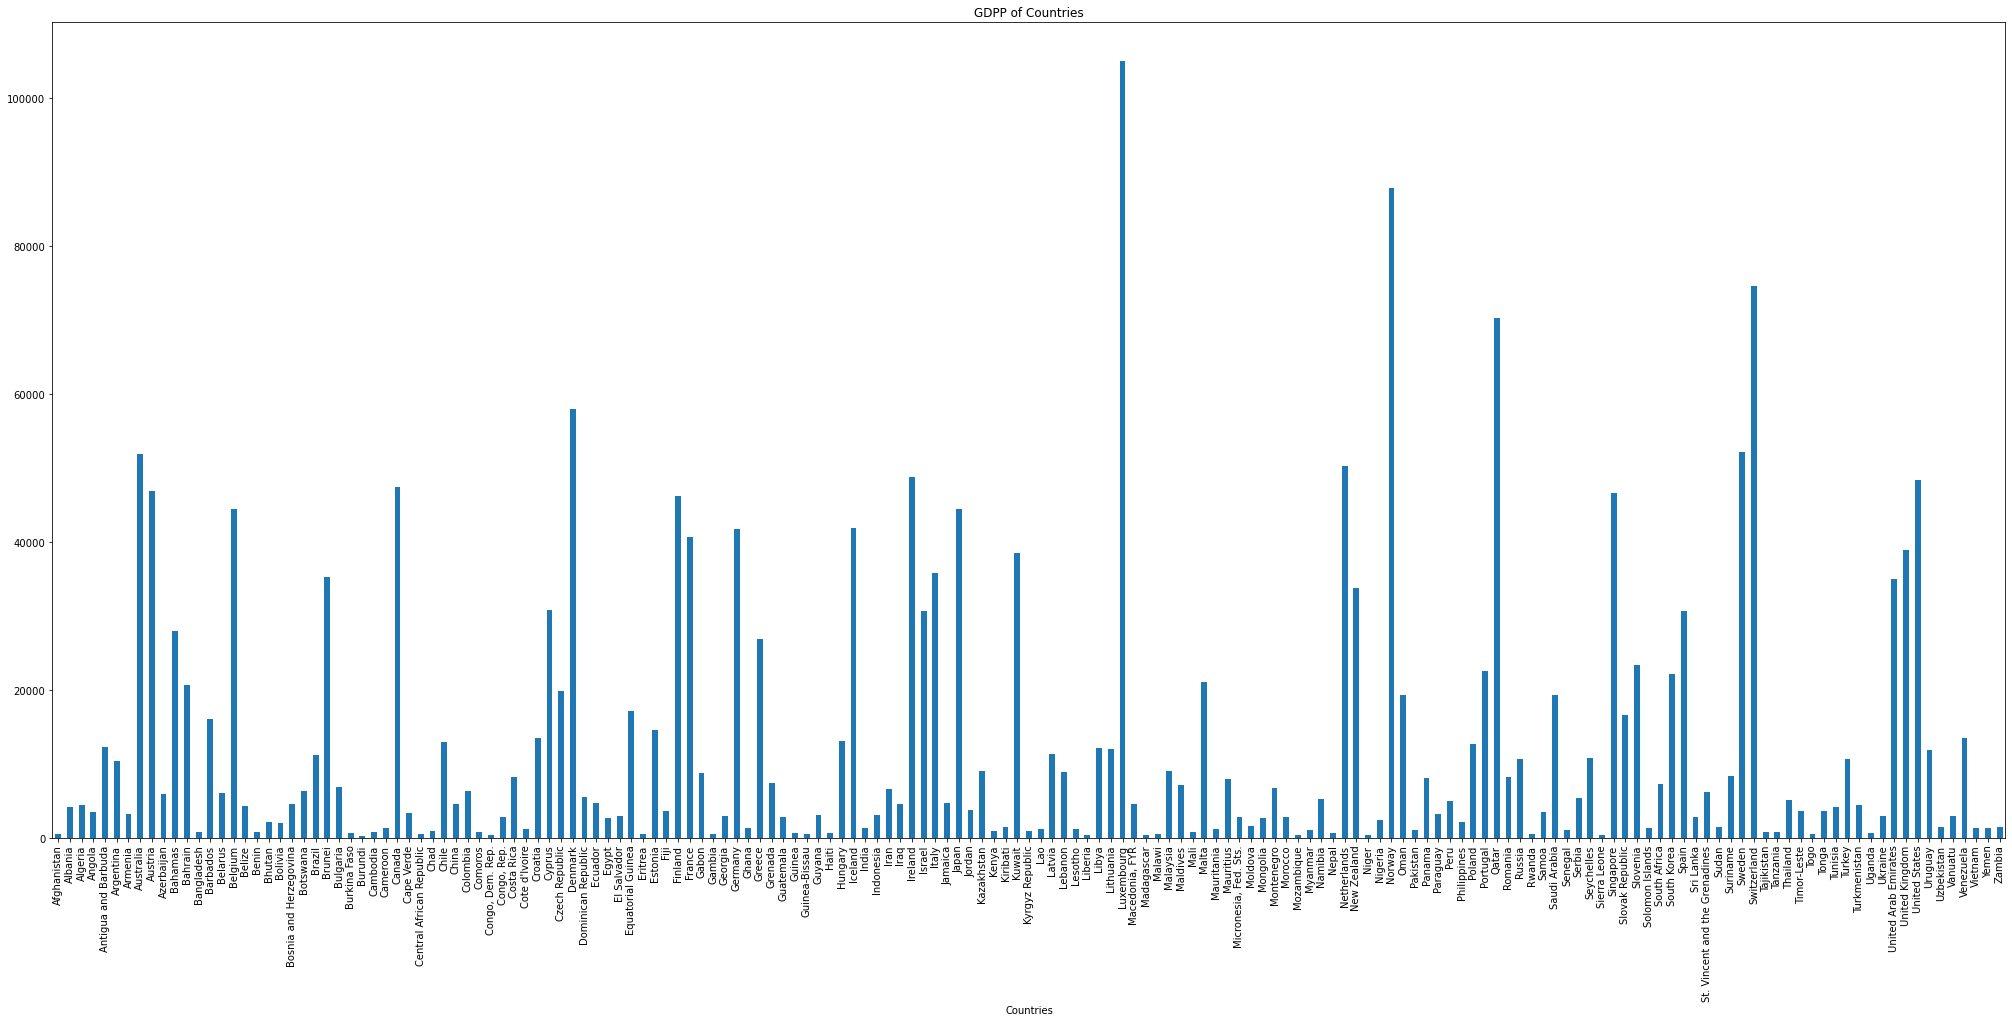

In [13]:
fig = plt.figure(figsize = (35,15))
country_data.set_index('country').gdpp.plot.bar()
plt.title("GDPP of Countries")
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.show()

**Note:** Please double click on the graph to zoom in.

As we can see, there are many countries here with considerably low gdpp.

**Luxembourg** is the country with highest gdpp!

##### 2. Child mortality of countries

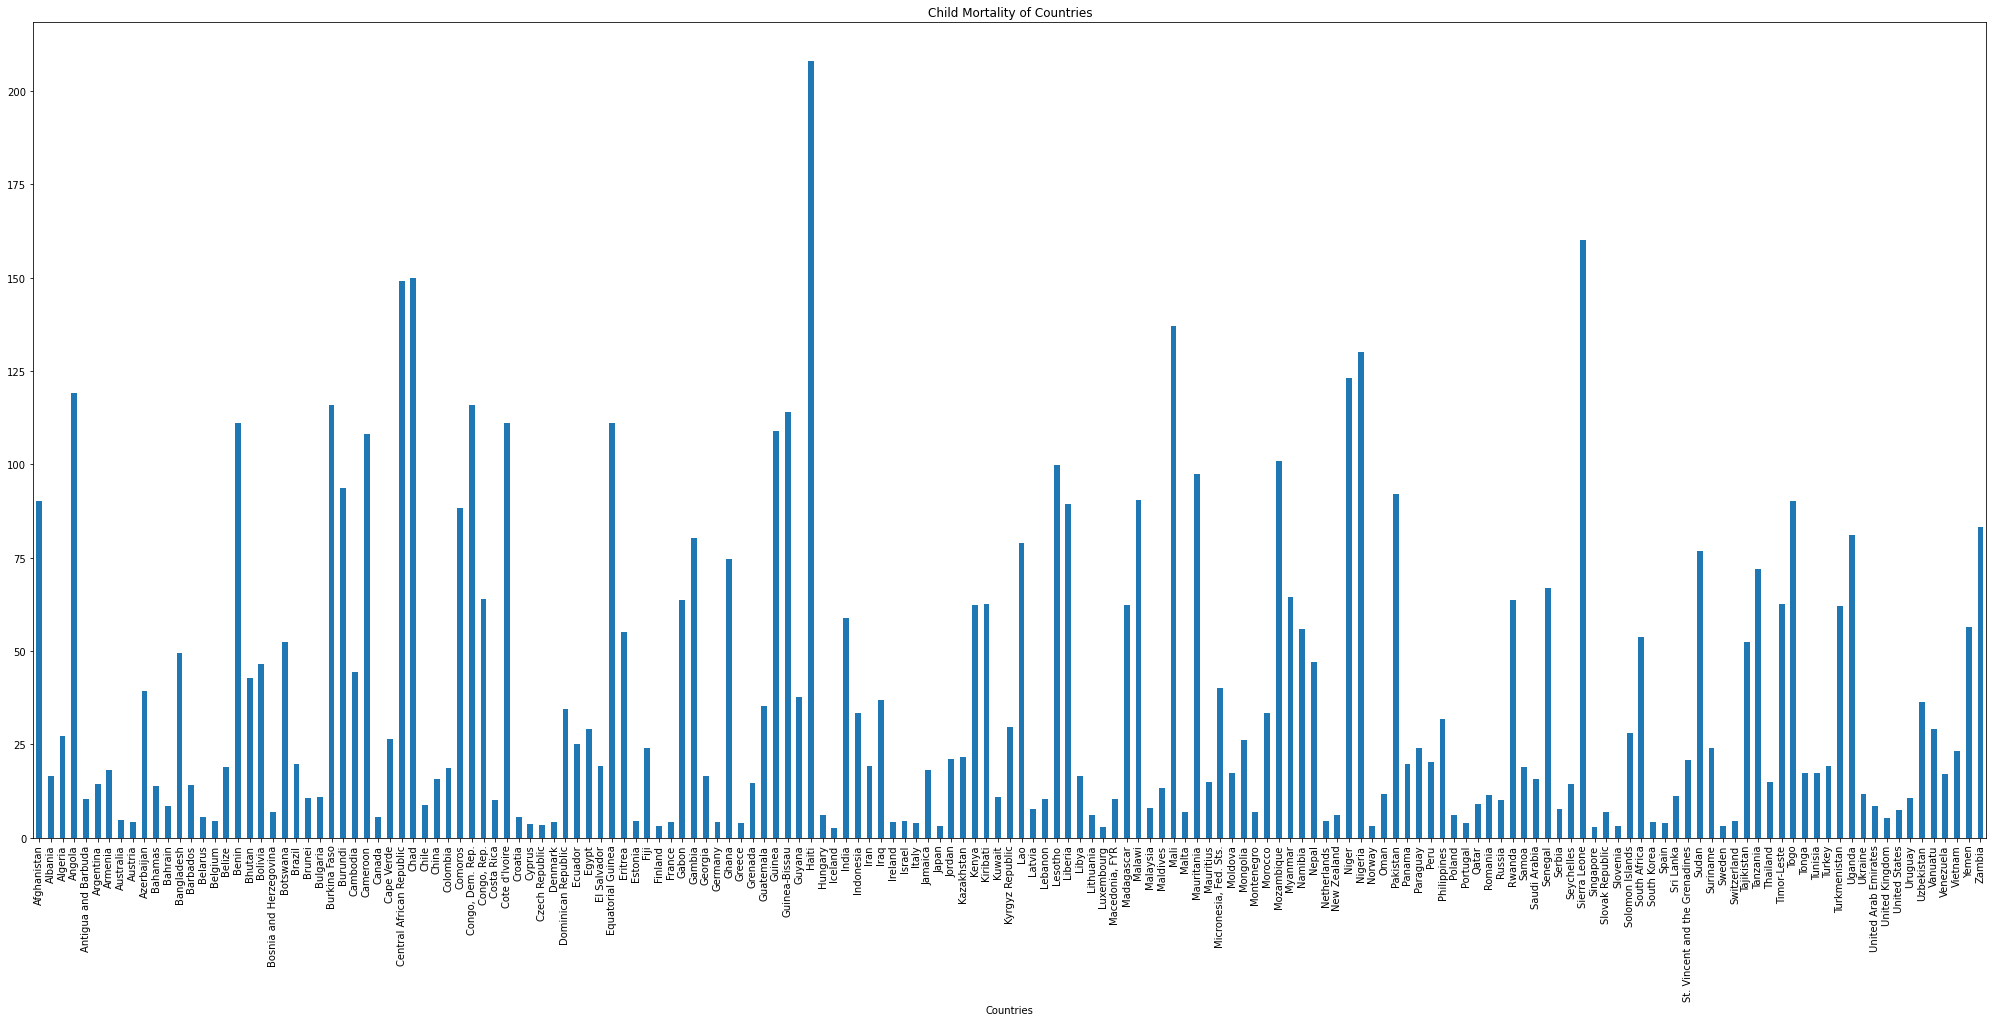

In [14]:
fig = plt.figure(figsize = (35,15))
country_data.set_index('country').child_mort.plot.bar()
plt.title("Child Mortality of Countries")
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.show()

**Note:** Please double click on the graph to zoom in.

As we can see, there are many countries here with appreciable child mortality rates.

**Haiti** is the country with highest child mortality rate!

##### 3. Income of countries

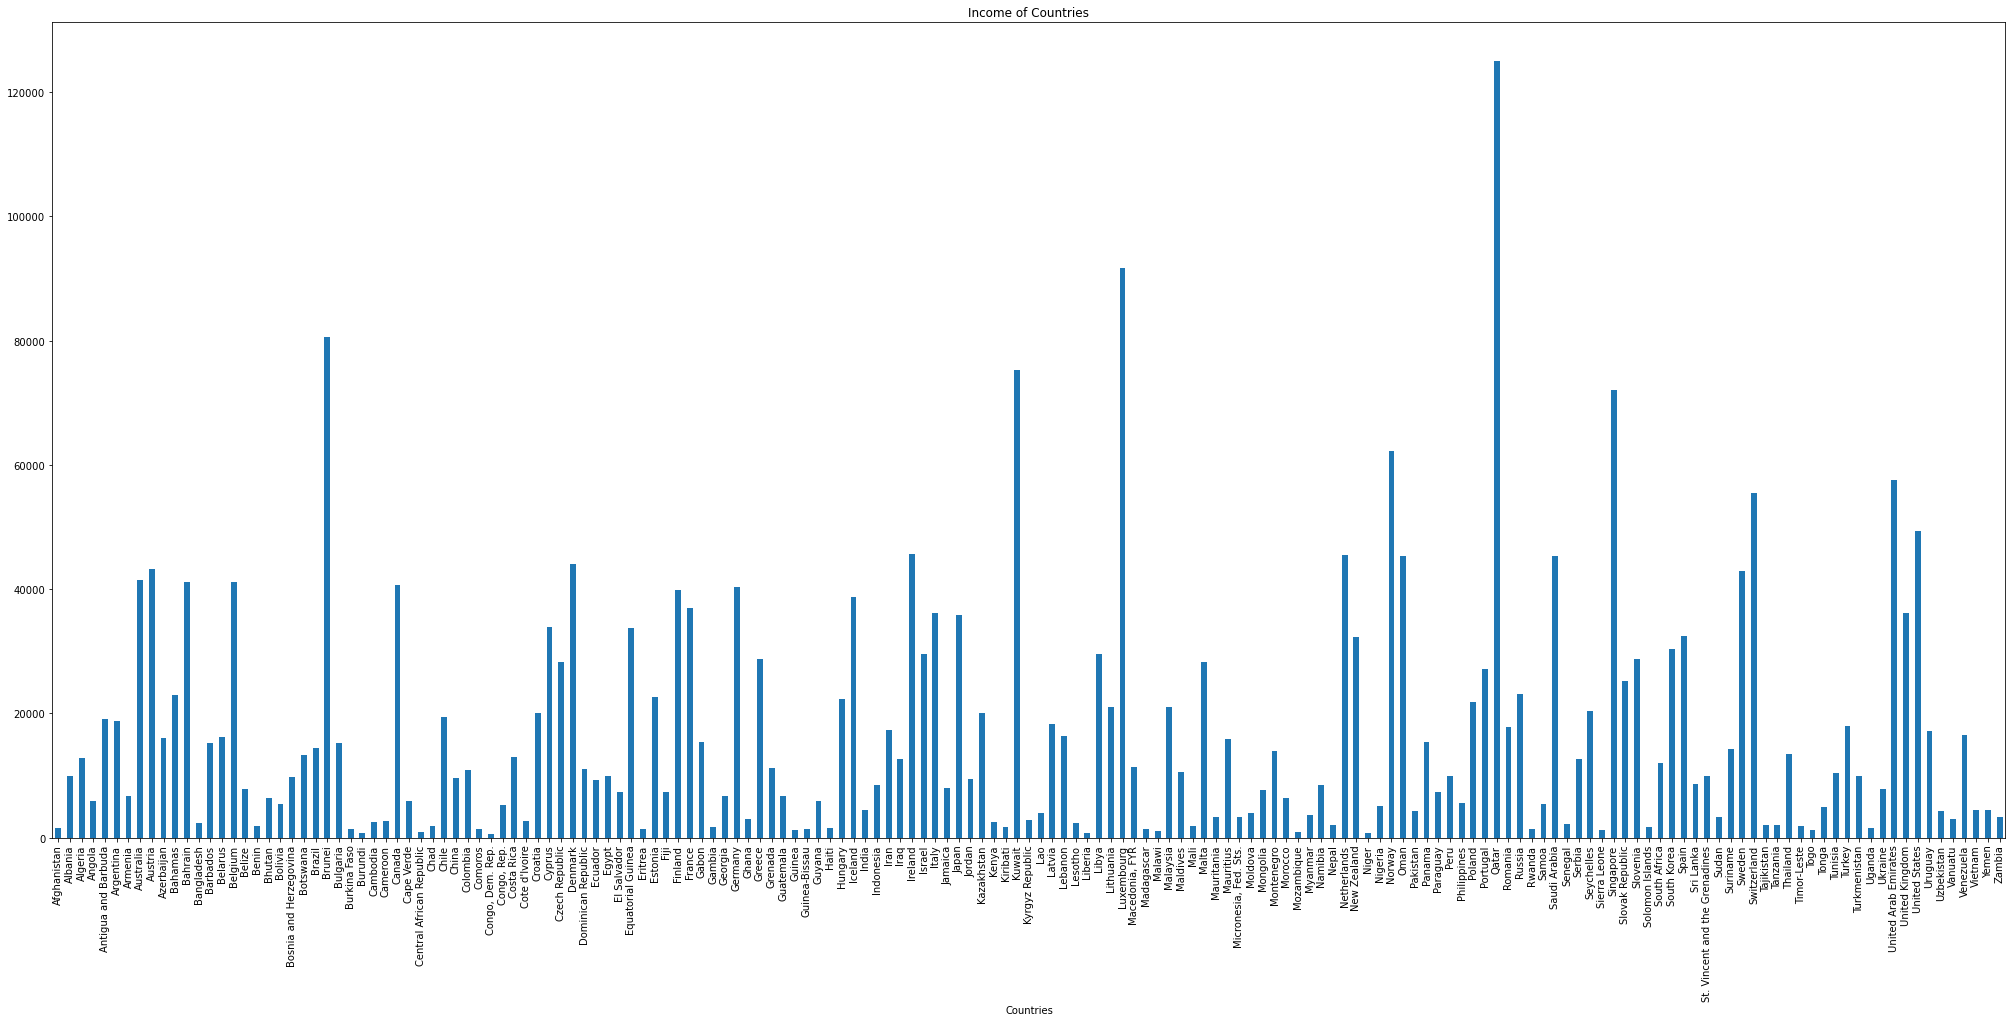

In [15]:
fig = plt.figure(figsize = (35,15))
country_data.set_index('country').income.plot.bar()
plt.title("Income of Countries")
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.show()

**Note:** Please double click on the graph to zoom in.

We have a mixed bag of countries with all levels of income.

**Qatar** is the country with highest income!

## 4. Outliers

### 4.1 Visualizing outliers -

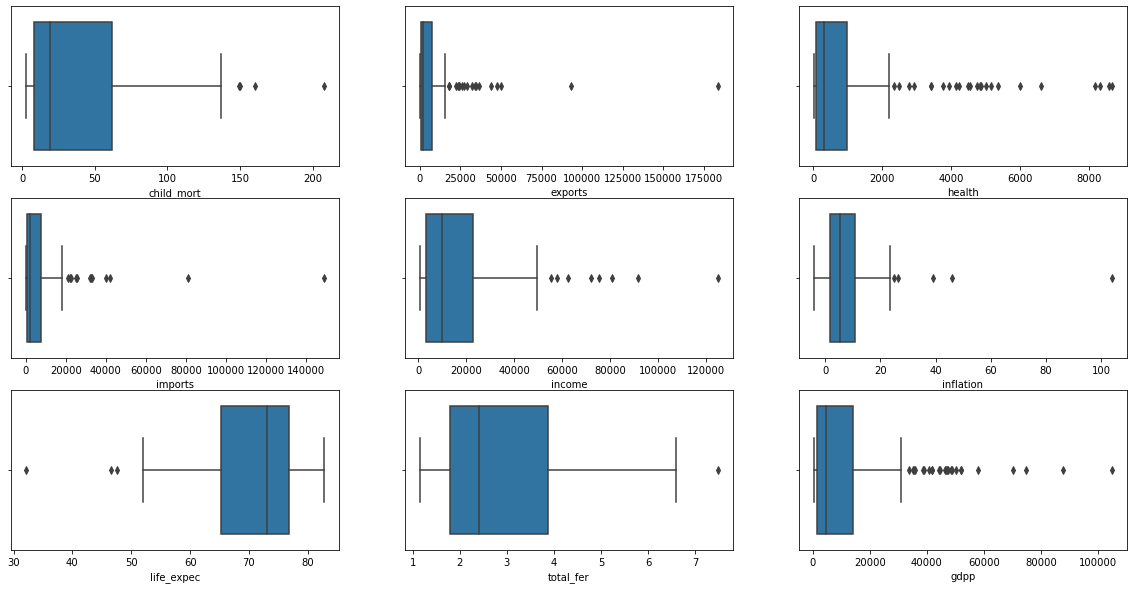

In [16]:
plt.figure(figsize = (20,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = country_data)

So here, it is evident from the boxplots that we do have outliers.

But the question is, what to do with them!

### 4.2 Treating the outliers

Although, removing the outliers is an option, but it's not suitable in this case since we already have very less data and
we might end up losing a lot of critical and useful information.

Next best method here, is soft capping since there are not many outliers.

Also, we need to do capping on the upper range on all columns except "child_mort" and "inflation", since we don't want to miss
data regarding countries that in need of the aid.

For "child_mort" and "inflation", we will go with capping of low range outliers.

In [17]:
# Treatment
q1 =  country_data['child_mort'].quantile(0.01)
q2 = country_data['exports'].quantile(0.99)
q3 = country_data['health'].quantile(0.99)
q4 = country_data['imports'].quantile(0.99)
q5 = country_data['income'].quantile(0.99)
q6 = country_data['inflation'].quantile(0.99)
q7 = country_data['life_expec'].quantile(0.99)
q8 = country_data['total_fer'].quantile(0.01)
q9 =country_data['gdpp'].quantile(0.99)

country_data['child_mort'][country_data['child_mort']<= q1] = q1
country_data['exports'][country_data['exports']>= q2] = q2
country_data['health'][country_data['health']>= q3] = q3
country_data['imports'][country_data['imports']>= q4] = q4
country_data['income'][country_data['income']>= q5] = q5
country_data['inflation'][country_data['inflation']>= q6] = q6
country_data['life_expec'][country_data['life_expec']>= q7] = q7
country_data['total_fer'][country_data['total_fer']<= q8] = q8
country_data['gdpp'][country_data['gdpp']>= q9] = q9

### 4.3 Checking for outliers after treatment

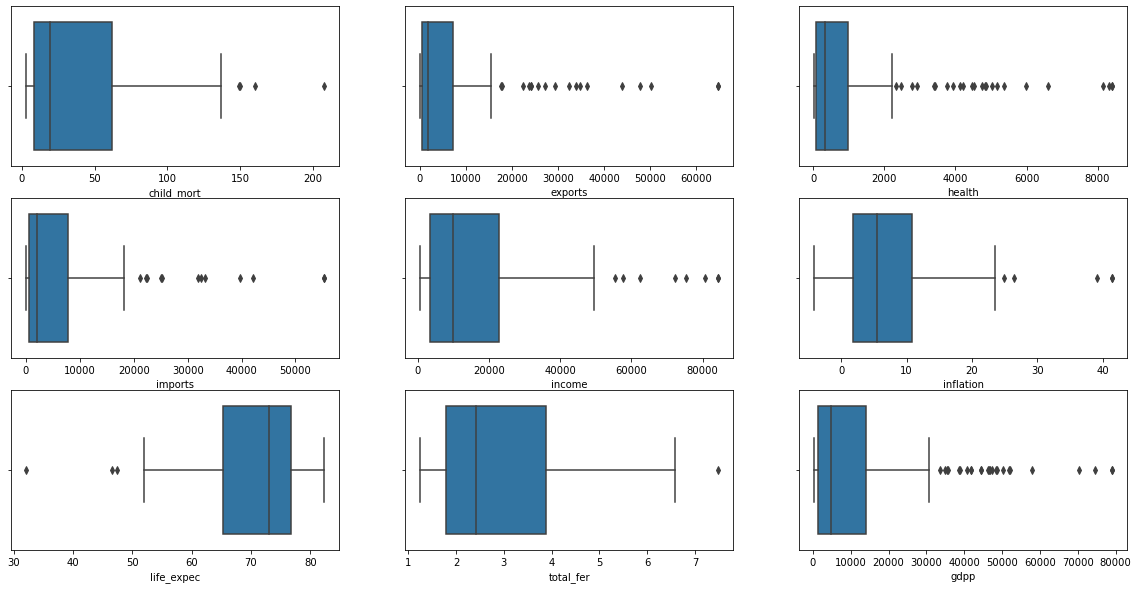

In [18]:
plt.figure(figsize = (20,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = country_data)

Since the outlier treatment is successfully done, let us take a look at the data!

In [19]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.948601,12756.826347
std,40.327869,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.513108,17430.208938
min,2.800000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.243200,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,7.490000,79088.000000


## 5. K-Means Clustering

### 5.1 Hopkins Statistic

The Hopkins Statistic gives a measure of the cluster tendancy of the data, i.e. how well the data can be clustered.
- H = {0.01 to 0.3} means data is regularly spaced
- H = 0.5 means data is randomly distributed
- H = {0.7 to 0.99} has high cluster tendancy

Let us check out what is the Hopkins Statistic for our data!

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(country_data.drop('country', axis = 1))

0.8394889937206996

After running the above code multiple times, we find out that the H value is coming out to be in between 0.8 - 0.9. Hence, we can safely go ahead with the clustering process.

### 5.2 Data preparation for clustering

#### 5.2.1 Scaling the data

In [22]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [23]:
for_scaled_country_data = country_data.drop("country", axis = 1)
for_scaled_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [24]:
# Instantiating
scaler = StandardScaler()
scaled_country_data = scaler.fit_transform(for_scaled_country_data)

In [25]:
scaled_country_data.shape

(167, 9)

Since, this is an Array, we need to convert it to Pandas DataFrame.

In [26]:
scaled_country_data = pd.DataFrame(scaled_country_data)
scaled_country_data.head()

,0,1,2,3,4,5,6,7,8
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.542634,-0.032042


In [27]:
for_scaled_country_data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Giving column names to our scaled dataset - 

In [28]:
scaled_country_data.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
scaled_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.542634,-0.032042


Now, our data is ready for modelling!

### 5.3 How many clusters?

Before moving forward with the clustering and profiling, we need to decide the logical number of clusters to obtain.

There are basically 2 statistical methods to find out the optimal number of clusters. They are -
- **Elbow Curve**
- **Silhouette Score**
    
However, apart from these methods, the number of clusters is finally decided keeping in mind the **business case and requirement** of the
client/organisation.

#### 5.3.1 Elbow Curve

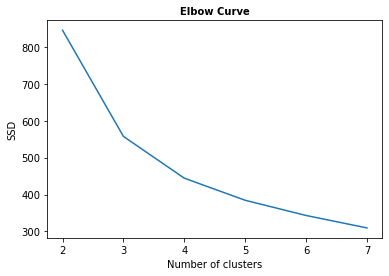

In [29]:
ssd = []
for num_clusters in range(2, 8):
    kmeans = KMeans(n_clusters = num_clusters).fit(scaled_country_data)
    ssd.append([num_clusters, kmeans.inertia_])
    
# Here, kmeans.inertia gives us the sum of squared distance of samples from their closest cluster center. (SSD)

ssd_df = pd.DataFrame(ssd)
plt.plot(ssd_df[0], ssd_df[1])
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.title('Elbow Curve',fontweight="bold", size=10)
plt.show()

We can see here that on moving from 2 clusters to 3 clusters, there is a steep decrease in SSD, but beyond 3, although the
SSD is decreasing, but not at that rate.

Hence, going from 3 cluters to 4 clusters is not fuitful.

Therefore, we will be going ahead with k = 3, from this graph.

#### 5.3.2 Silhouette Score

##### Finding the Silhouette Scores -

In [30]:
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50,random_state=100)
    kmeans.fit(scaled_country_data)
    
    cluster_labels=kmeans.labels_
    
    silhouette_avg=silhouette_score(scaled_country_data,cluster_labels)
    print("For n_clusters={0},the silhouetee score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouetee score is 0.46936557781315624
For n_clusters=3,the silhouetee score is 0.40283254701298715
For n_clusters=4,the silhouetee score is 0.3912787899951438
For n_clusters=5,the silhouetee score is 0.3832529105528356
For n_clusters=6,the silhouetee score is 0.2935078580570956
For n_clusters=7,the silhouetee score is 0.30462515661059425
For n_clusters=8,the silhouetee score is 0.32091595670692885


##### Plotting the score for visualization - 

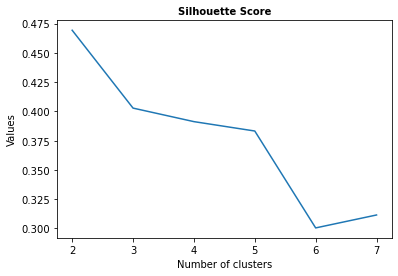

In [31]:
from sklearn.metrics import silhouette_score
ss = []
for num_clusters in range(2, 8):
    kmeans = KMeans(n_clusters = num_clusters).fit(scaled_country_data)
    ss.append([num_clusters, silhouette_score(scaled_country_data, kmeans.labels_)])
ss_df = pd.DataFrame(ss)    
plt.plot(ss_df[0], ss_df[1])
plt.xlabel('Number of clusters')
plt.ylabel('Values')
plt.title('Silhouette Score',fontweight="bold", size=10)
plt.show()

Here, mathematically we can see that num_clusters = 2 is the best because Silhouette score for the same is maximum, but from a business point of view, that might not be the case. Hence, we will go with the next best, i.e. **num_clusters = 3**.

### 5.4 Clustering (with 3 clusters)

In [32]:
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state = 100)
kmeans.fit(scaled_country_data)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [33]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

##### Making a copy of our original data set:

In [34]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [35]:
country_data.shape

(167, 10)

In [36]:
country_data_km = country_data.copy()

##### Adding cluster labels column to our dataset:

In [37]:
country_data_km['kmeans_labels'] = kmeans.labels_
country_data_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [38]:
country_data_km.shape

(167, 11)

##### Checking the value counts in all clusters:

In [39]:
country_data_km.kmeans_labels.value_counts()

2    90
1    48
0    29
Name: kmeans_labels, dtype: int64

### 5.5 Visualizing and studying the clusters

Having our clusters ready, let us study the data on the basis of 3 important variables mentioned below - 
- child_mort
- income
- gdpp

#### 5.5.1 Scatter plots

##### child_mort & income

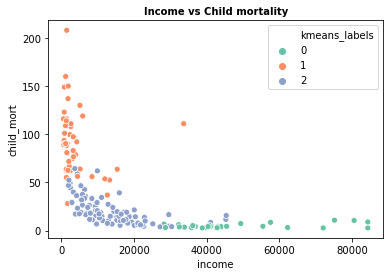

In [40]:
sns.scatterplot(x='income',y='child_mort',hue='kmeans_labels',data=country_data_km,palette='Set2')
plt.title("Income vs Child mortality",fontweight="bold", size=10)
plt.show()

It is evident that contries with lesser income tend to have higher child mortality rates. This is quite intutive as well!

- The Orange cluster (1) shows countries which are too less income and an awfully high child mortality rates.
- The Purple cluster (2) shows countries which are in a better income class and lesser child mortality rates.
- The Green cluster (0) shows high income class countries with very less child mortality rates.

##### gdpp & income

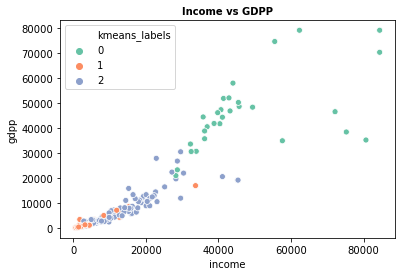

In [41]:
sns.scatterplot(x='income',y='gdpp',hue='kmeans_labels',data=country_data_km,palette='Set2')
plt.title("Income vs GDPP",fontweight="bold", size=10)
plt.show()

This graph also shows a pretty much obvious trend, where the GDPP and income increase is going hand in hand.
The Orange (1), Purple(2), Green(0) clusters respectively show the 3 income/gpdd classes of the countries.

##### child_mort & gdpp

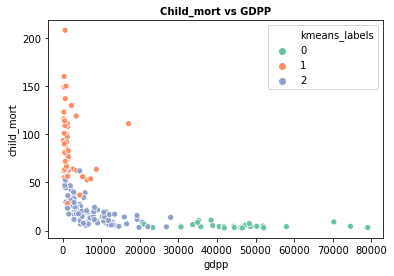

In [42]:
sns.scatterplot(x='gdpp',y='child_mort',hue='kmeans_labels',data=country_data_km,palette='Set2')
plt.title("Child_mort vs GDPP",fontweight="bold", size=10)
plt.show()

It is evident that contries with lesser GDPP tend to have higher child mortality rates.

- The Orange cluster (1) shows countries which have too less GDPP and very high child mortality rates.
- The Purple cluster (2) shows countries which have better GDPP and lesser child mortality rates.
- The Green cluster (0) shows high GDPP countries with very less child mortality rates.

#### 5.5.2 Cluster Profiling

In [43]:
for_profiling = country_data_km.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1)
for_profiling.head()

,child_mort,income,gdpp,kmeans_labels
0,90.2,1610.0,553.0,1
1,16.6,9930.0,4090.0,2
2,27.3,12900.0,4460.0,2
3,119.0,5900.0,3530.0,1
4,10.3,19100.0,12200.0,2


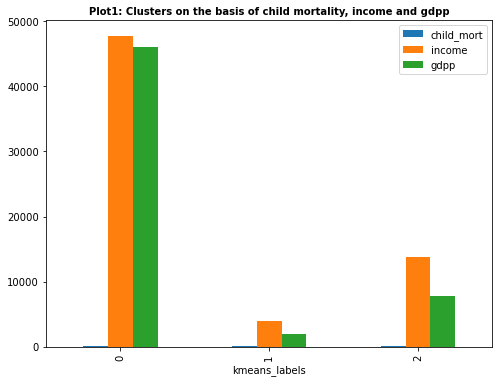

In [44]:
for_profiling.groupby('kmeans_labels').mean().plot(kind='bar',figsize=(8,6))
plt.title("Plot1: Clusters on the basis of child mortality, income and gdpp",fontweight="bold", size=10)
plt.show()

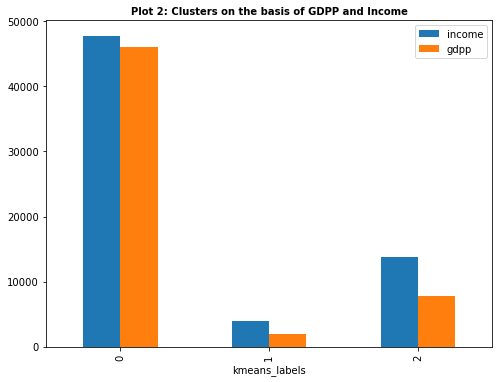

In [45]:
for_profiling[['income','gdpp','kmeans_labels']].groupby('kmeans_labels').mean().plot.bar(figsize=(8,6))
plt.title("Plot 2: Clusters on the basis of GDPP and Income",fontweight="bold", size=10)
plt.show()

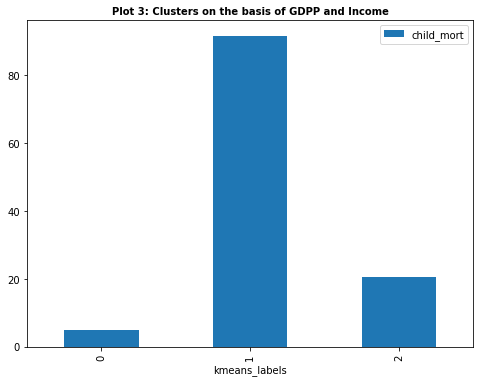

In [46]:
for_profiling[['child_mort','kmeans_labels']].groupby('kmeans_labels').mean().plot.bar(figsize=(8,6))
plt.title("Plot 3: Clusters on the basis of GDPP and Income",fontweight="bold", size=10)
plt.show()

From the Plot 2 we can see, that countries in cluster 1 have low income and GDPP. Plot 3 shows that the same cluster (cluster 1) has high child mortality rates.

##### Therefore, we can conclude from the all the graphs obtained above, that the countries in cluster 1, (Orange cluster obtained in the scatter plots) can be categorised as the ones in dire need of aid.

Now, let us make a dataset of all the countries in need of the aid!

### 5.6 Obtaining the dataset of the countries in need of the aid

In [47]:
aid_countries = country_data_km[country_data_km['kmeans_labels'] == pd.DataFrame(country_data_km['kmeans_labels'].value_counts()[country_data_km['kmeans_labels'].value_counts()==48]).reset_index().iloc[0,0]].sort_values(by = ['child_mort','income','gdpp'], ascending = [False,True,True])
aid_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,1
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,1
97,Mali,137.0,161.4240,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,1
113,Nigeria,130.0,589.4900,118.1310,405.420,5150.0,41.478,60.5,5.84,2330.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1


In [48]:
aid_countries.shape

(48, 11)

#### Hence, the top 10 countries in extreme need of the aid are:

In [49]:
aid_countries.head(10).country

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object

## 6. Hierarchical Clustering

### 6.1 Making a copy of dataset

In [50]:
scaled_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.542634,-0.032042


In [51]:
for_hierachical = scaled_country_data.copy()

### 6.2 Single Linkage

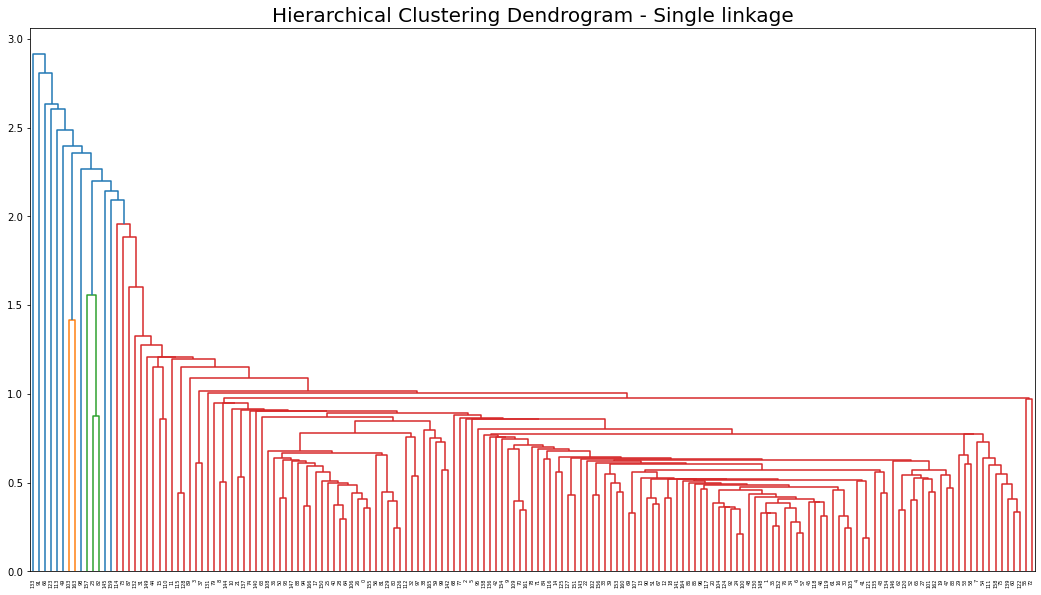

In [52]:
fig = plt.figure(figsize=(18,10))
plt.title('Hierarchical Clustering Dendrogram - Single linkage',fontsize=20)
mergings = linkage(for_hierachical, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

### 6.3 Complete Linkage

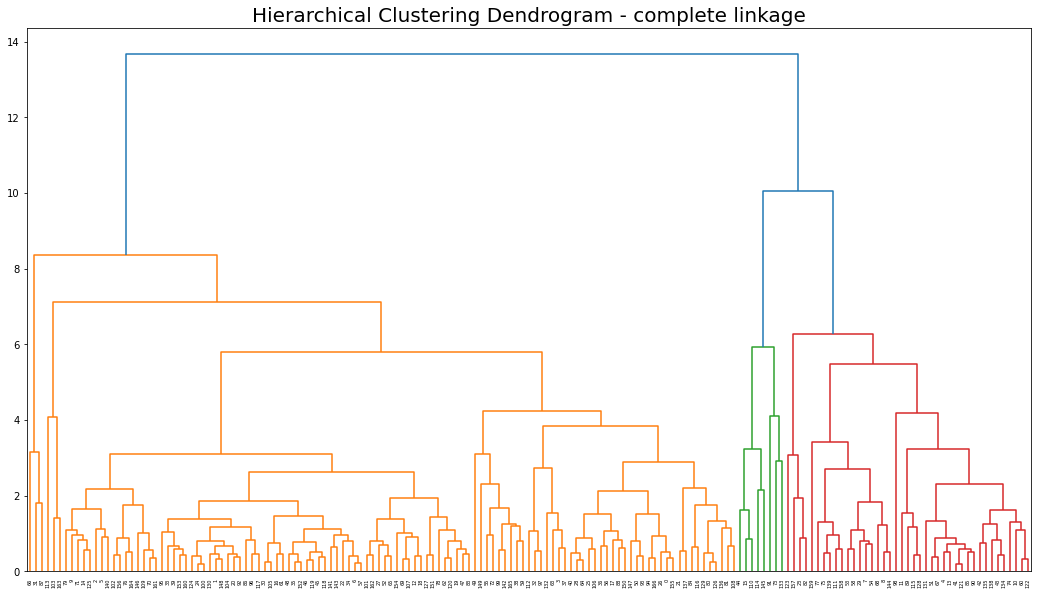

In [53]:
fig = plt.figure(figsize=(18,10))
plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
mergings=linkage(for_hierachical,method="complete",metric="euclidean")
dendrogram(mergings,leaf_rotation=90)
plt.show()

In [54]:
# Applying k=3 clusters
cut_tree(mergings,n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [55]:
cut_tree(mergings,n_clusters=3).shape

(167, 1)

In [56]:
cl_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cl_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [57]:
country_data_hierarchical = country_data.copy()

In [58]:
country_data_hierarchical["clusters_labels"] = cl_labels

In [59]:
country_data_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [60]:
country_data_hierarchical.clusters_labels.value_counts()

0    118
1     41
2      8
Name: clusters_labels, dtype: int64

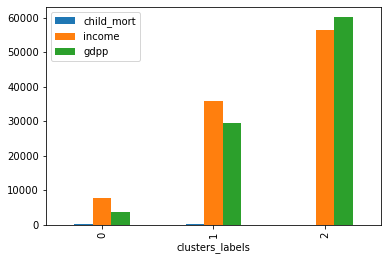

In [61]:
country_data_hierarchical.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('clusters_labels').mean().plot(kind='bar')
plt.show()

In [62]:
drop_col=country_data_hierarchical.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1)
drop_col.head()

,child_mort,income,gdpp,clusters_labels
0,90.2,1610.0,553.0,0
1,16.6,9930.0,4090.0,0
2,27.3,12900.0,4460.0,0
3,119.0,5900.0,3530.0,0
4,10.3,19100.0,12200.0,1


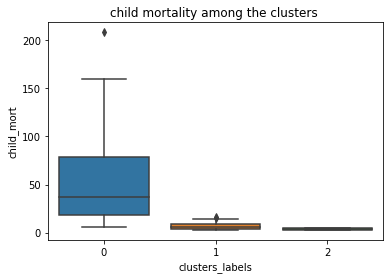

In [63]:
sns.boxplot(x="clusters_labels",y="child_mort",data=drop_col)
plt.title("child mortality among the clusters ")
plt.show()

Here, there are many coutries in cluster 0, that have high child mortality rate

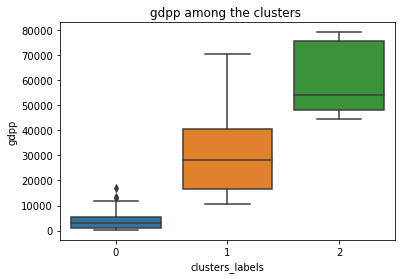

In [64]:
sns.boxplot(x="clusters_labels",y="gdpp",data=drop_col)
plt.title("gdpp among the clusters ")
plt.show()

As we can see here, countries in the cluster 2 have high GDPP

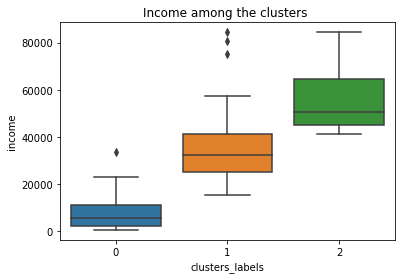

In [65]:
sns.boxplot(x="clusters_labels",y="income",data=drop_col)
plt.title("Income among the clusters ")
plt.show()

Countries in cluster 2 have high income level

In [66]:
final_hier = country_data_hierarchical[country_data_hierarchical["clusters_labels"]==0].sort_values( by=["child_mort","gdpp","income"],ascending=[False,True,True])
final_hier.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.84,2330.0,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


**Similarity:**
As we can see here, the list of the countries obtained in Hierarchical method is same as that of obtained in the K-Means
method.

In [67]:
country_data_hierarchical[country_data_hierarchical["clusters_labels"]==0].shape

(118, 11)

## 7. Final K-Means Analysis

In [68]:
aid_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.992083,1909.208333,1.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,8.511174,6.384914,1.036192,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,1.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,1.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,1.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,41.478000,71.100000,7.490000,17100.000000,1.0


### 7.1 Countries with child mortality rates more than 75%

In [69]:
final_childmort=aid_countries[aid_countries["child_mort"]>111]
final_childmort.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,1
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,1
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,1
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.84,2330.0,1
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1


### 7.2 Countries having less 25% of income

In [70]:
final_income=aid_countries[aid_countries["income"]<1390]
final_income.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648.0,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,1
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488.0,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1


### 7.3 Countries having less 25% of GDPP

In [71]:
final_gdpp=aid_countries[aid_countries["gdpp"]<551.5]
final_gdpp.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_labels
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.05,547.0,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,1
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488.0,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1


## 8. Final Hierarchical Analysis

In [72]:
final_hier.shape

(118, 11)

In [73]:
final_hier.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0
mean,51.512712,1466.113115,238.174789,1582.123747,7581.889831,9.187966,67.125424,3.425508,3732.322034,0.0
std,41.220816,1901.531192,241.924386,1579.019165,6190.962699,8.059861,8.281471,1.546376,3415.159019,0.0
min,5.500000,1.076920,12.821200,0.651092,609.000000,0.238000,32.100000,1.270000,231.000000,0.0
25%,18.650000,198.669750,52.431750,390.971250,2230.000000,3.710000,60.825000,2.177500,972.250000,0.0
50%,36.600000,863.510000,145.660000,1212.890000,5870.000000,6.975000,68.650000,2.880000,2910.000000,0.0
75%,78.350000,2048.235000,349.759500,2320.110000,11175.000000,12.450000,73.975000,4.840000,5355.000000,0.0
max,208.000000,14671.800000,1026.840000,10071.900000,33700.000000,41.478000,80.400000,7.490000,17100.000000,0.0


### 8.1 Countries more than 75% child mortality rate

In [74]:
final_hierarchy_mort=final_hier[final_hier["child_mort"]>78.35]
final_hierarchy_mort.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.84,2330.0,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


### 8.2 Countries with less than 25% of GDPP

In [75]:
final_hierarchy_gdpp=final_hier[final_hier["gdpp"]<972.25]
final_hierarchy_gdpp.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390.0,2.970,55.6,5.05,547.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0


### 8.3 Countries with less than 25% of income

In [76]:
final_income=final_hier[final_hier["income"]<3290]
final_income.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390.0,2.970,55.6,5.05,547.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0


## 9. Conclusion

After having a close look at the results obtained by K-Means and Hierachical clustering, we can finally name some common
countries that appear in both lists.

**Hence the top 10 countries in direst need of aid are- **

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali
- Nigeria
- Niger
- Angola
- Congo, Dem. Rep.